In [1]:
import os
import sys
import csv
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display
sys.path.append('./chemical_vae-main')
sys.path

['G:\\Program Files\\PerkinElmerInformatics\\ChemOffice2022\\ChemScript\\Lib',
 'f:\\conda_envs\\chemvae2\\python36.zip',
 'f:\\conda_envs\\chemvae2\\DLLs',
 'f:\\conda_envs\\chemvae2\\lib',
 'f:\\conda_envs\\chemvae2',
 '',
 'f:\\conda_envs\\chemvae2\\lib\\site-packages',
 'f:\\conda_envs\\chemvae2\\lib\\site-packages\\win32',
 'f:\\conda_envs\\chemvae2\\lib\\site-packages\\win32\\lib',
 'f:\\conda_envs\\chemvae2\\lib\\site-packages\\Pythonwin',
 'f:\\conda_envs\\chemvae2\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\suo\\.ipython',
 './chemical_vae-main']

In [2]:
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Using TensorFlow backend.
f:\conda_envs\chemvae2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
f:\conda_envs\chemvae2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
f:\conda_envs\chemvae2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
f:\conda_envs\chemvae2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: Fu

In [3]:
vae = VAEUtils(directory='./chemical_vae-main/models/zinc_properties')

From f:\conda_envs\chemvae2\lib\site-packages\keras\backend\tensorflow_backend.py:1210: calling reduce_prod (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
f:\conda_envs\chemvae2\lib\site-packages\keras\models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
From f:\conda_envs\chemvae2\lib\site-packages\keras\backend\tensorflow_backend.py:1192: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From f:\conda_envs\chemvae2\lib\site-packages\keras\backend\tensorflow_backend.py:1156: calling reduce_max (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be 

Using standarized functions? True
Standarization: estimating mu and std values ...done!


In [10]:
csv_file_path = './data/all_data.csv'
df_all = pd.read_csv(csv_file_path)
canonical_smiles_column = df_all['Canonical SMILES']
canonical_smiles_column_list = canonical_smiles_column.to_list()
canonical_smiles_column_list

['C(CC(=O)O)CN',
 'C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3',
 '[B-](C1=CC=CC=C1)(C2=CC=CC=C2)(C3=CC=CC=C3)C4=CC=CC=C4.[Na+]',
 'CCCS(=O)(=O)O',
 'CCCCCCCCCCCCC1=CC=C(C=C1)S(=O)(=O)O',
 'COC(=O)C1=CC=CN1',
 'CC(C)CN(CC(C)C)CC(C)C',
 'CCCCN1C=C[N+](=C1)C.C(F)(F)(F)S(=O)(=O)[O-]',
 'C(C1C2C(C(C(O1)OC3C(OC(C(C3O)O)OC4C(OC(C(C4O)O)OC5C(OC(C(C5O)O)OC6C(OC(C(C6O)O)OC7C(OC(O2)C(C7O)O)CO)CO)CO)CO)CO)O)O)O',
 'C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3)C4=CC=CC=C4',
 'CC(=O)SCC[N+](C)(C)C.[I-]',
 'C1=CC(=CC(=C1)CN)CN',
 'COCCOC(=O)C=C',
 'C1=CC(=CC(=C1)Br)CN.Br',
 'C1=CC(=CC=C1N)N=NC2=CC=C(C=C2)N',
 'CCCC(=O)N',
 'C1=CC(=CC(=C1)S(=O)(=O)N)NN',
 'C1CCC(C(C1)N)N',
 'CCCC[N+](CCCC)(CCCC)CCCC.C(F)(F)(F)S(=O)(=O)[O-]',
 'C[NH3+].C(=O)[O-]',
 nan,
 'CCCCCCCC(=O)O',
 'CCCCCCCCP(CCCCCCCC)CCCCCCCC',
 'CCOC(=O)C=C',
 'C1=CC(=NC(=C1)C(=O)O)C(=O)O',
 'C1=CC(=CC=C1N)OC2=CC=C(C=C2)N',
 'CCCCCCN(CCCCCC)CCCCCC',
 'C1=CC(=CC=C1CC(=O)O)CC(=O)O',
 'B1(OC(C(O1)(C)C)(C)C)C2=CC=C(C=C2)OC',
 'C1=CC=C(C=C1)CN',
 'C1=CC(=CC

In [11]:
def get_z_frome_led_smiles(led_smiles):
    z_led = []
    error_indices = []  

    for i in range(len(led_smiles)):
        try:
            smiles = mu.canon_smiles(led_smiles[i])
            X_se = vae.smiles_to_hot(smiles, canonize_smiles=True)
            z_se = vae.encode(X_se)
            z_led.append(z_se)
        except Exception as e:
            print(f"Error at index {i}: {e}")
            z_led.append(None)  
            error_indices.append(i)  

    print("Indices with errors:", error_indices)
    return z_led,error_indices

def process_smiles_list(smiles_list, noise_level=5.0, decode_attempts=1000):
    all_dfs = []  
    for smiles in smiles_list:
        smiles_canon = mu.canon_smiles(smiles)
        X = vae.smiles_to_hot(smiles_canon, canonize_smiles=True)
        z = vae.encode(X)
        df = vae.z_to_smiles(z, decode_attempts=decode_attempts, noise_norm=noise_level)
        
        all_dfs.append(df)

    return all_dfs

In [12]:
z_leds,error_indices=get_z_frome_led_smiles(canonical_smiles_column_list)
z_leds=np.array(z_leds)

ERROR: Check chars file. Bad SMILES: [Na+].c1ccc([B-](c2ccccc2)(c2ccccc2)c2ccccc2)cc1                                                                        
Error at index 2: 'a'
ERROR: Check chars file. Bad SMILES: CCCCn1cc[n+](C)c1.O=S(=O)([O-])C(F)(F)F                                                                                 
Error at index 7: '.'
ERROR: Check chars file. Bad SMILES: CC(=O)SCC[N+](C)(C)C.[I-]                                                                                               
Error at index 10: '.'
ERROR: Check chars file. Bad SMILES: Br.NCc1cccc(Br)c1                                                                                                       
Error at index 13: '.'
ERROR: Check chars file. Bad SMILES: CCCC[N+](CCCC)(CCCC)CCCC.O=S(=O)([O-])C(F)(F)F                                                                          
Error at index 18: '.'
ERROR: Check chars file. Bad SMILES: C[NH3+].O=C[O-]                                             

f:\conda_envs\chemvae2\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Found 73 unique mols, out of 131
SMILES
 0            N=COC(=O)O
1            N#CC(CO)=O
2            C#CC(CO)CO
3           C#CC(C=O)=O
4            N#C/C(=O)O
            ...        
68    OCC(C(=O)N)NC(F)F
69    OCC(C(=O)O)NC(C)O
70           SCC/C(=O)O
71         N=C(C(=O)O)C
72    N=C(S(=O)=O)C(F)F
Name: smiles, Length: 73, dtype: object


f:\conda_envs\chemvae2\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


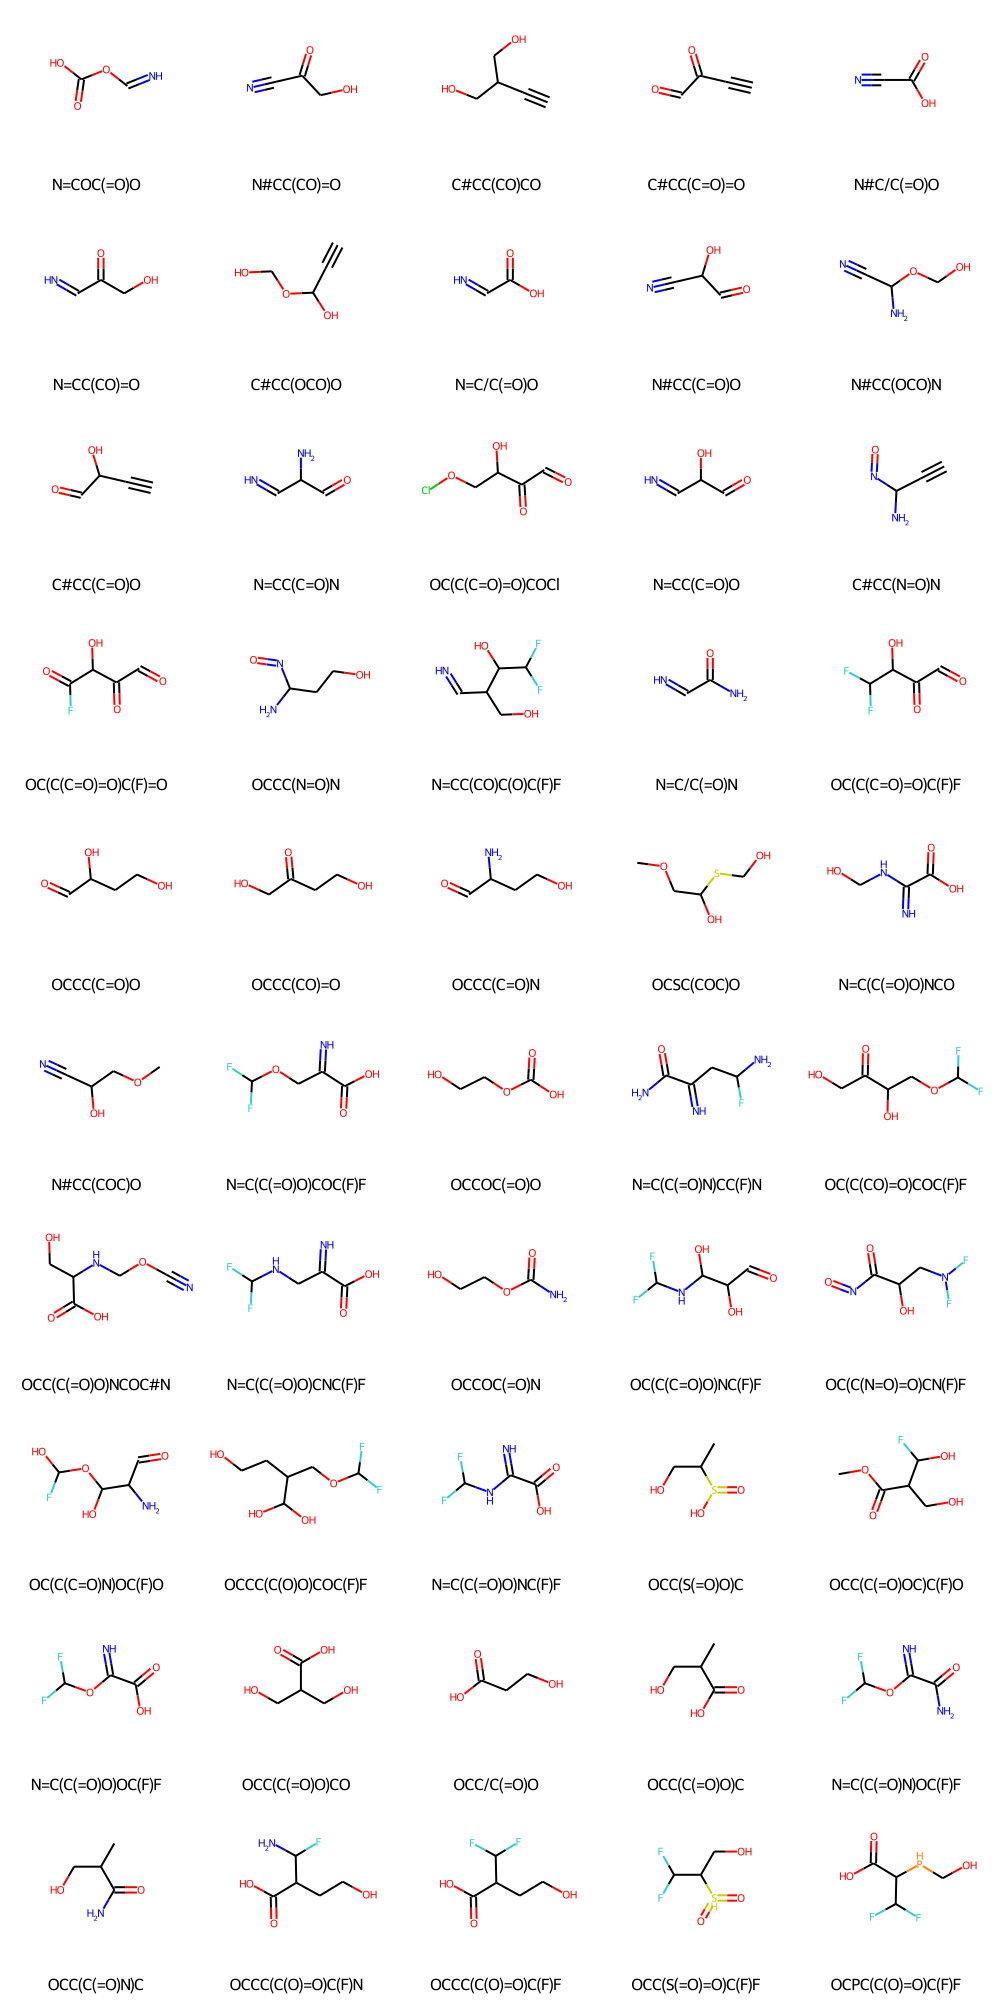

In [ ]:
df_1=process_smiles_list(canonical_smiles_column_list[:1])

for df in df_1:
    print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
    print('SMILES\n',df.smiles)
    display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
    df.head()

In [16]:
df_1 = process_smiles_list(canonical_smiles_column_list[:1])

folder_path = './gen_results/results2'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for i, df in enumerate(df_1):
    file_path = os.path.join(folder_path, f"smiles_output_{i}.csv")
    df.to_csv(file_path, index=False)